# PCA using library implementation
Here, we use Principal Component Analysis (or dimensionality reduction) for feature selection. 

## Dataset operations

In [14]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
# Importing dataset     
df = pd.read_csv( "../ML-Project-CS361/cleaned_shifted_data.csv" ) 
drop_cols = [0,1,2,12,14,16]
drop_cols = df.columns[drop_cols]  
drop_cols # Dropping unecessary columns

Index(['Timestamp', 'Unnamed: 0', 'Station', 'Checks', 'AQI_bucket_calculated',
       'AQI_bucket_calculated_shifted'],
      dtype='object')

In [16]:
# Drop the columns and make the changes in-place
df.drop(columns=drop_cols, inplace=True)

In [17]:
# The dataset has a size of 1,74,762 records, 10 features, 1 target variable
print(df.shape) 

(174762, 11)


In [18]:
# Separating the features and labels/target variables
X = df.drop('AQI_calculated_shifted',axis = 1)  # feature set
Y = df['AQI_calculated_shifted'] # target variable
print(X.shape)
print(Y.shape)

(174762, 10)
(174762,)


In [19]:
# Standardize the Data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-0.2284613 , -0.27947897, -0.40159894, ..., -0.46348286,
        -0.37032615, -0.70256623],
       [-0.2284613 , -0.27947897, -0.38000926, ..., -0.44749643,
        -0.38256664, -0.69301701],
       [-0.23480768, -0.2801947 , -0.37377224, ..., -0.44749643,
        -0.39087269, -0.69301701],
       ...,
       [ 0.18906354,  0.02470543, -0.16123382, ...,  0.06406919,
         1.86356376,  1.01629424],
       [ 0.22246553,  0.02470543, -0.16123382, ...,  0.11202847,
         0.88869596,  0.93035122],
       [ 0.17236255,  1.06251102, -0.16123382, ...,  0.15998775,
         0.53459599,  0.82530974]])

## PCA functions

In [20]:
# Carry out PCA to reduce the number of features from 10 to 7 components
pca = PCA(n_components = 7) 
X_pca = pca.fit_transform(X_std)
X_pca

array([[-0.31682799, -0.35458506, -1.85790988, ...,  1.24041138,
         0.73962884,  0.71971734],
       [-0.21455445, -0.44131614, -2.08397493, ...,  1.42372596,
         0.96411184,  0.82850581],
       [-0.2859048 , -0.38400894, -1.92221126, ...,  1.26647991,
         0.8519778 ,  0.75451974],
       ...,
       [-0.11382418, -0.69660764,  2.43099497, ...,  0.39413794,
         0.97555442, -0.2316165 ],
       [ 0.08565998, -0.86826862, -0.06979973, ..., -0.87611315,
        -0.39801451, -0.46929763],
       [ 0.51134326, -1.06732762, -0.09721142, ..., -0.95182143,
        -0.67194761, -0.52017026]])

In [21]:
print(X_pca.shape)

(174762, 7)


## Explained Variance

In [22]:
# Calculate the cumulative variance ratio for number of features= 1->7
explained_var_ratio = pca.explained_variance_ratio_  
cumulative_var_ratio = np.cumsum(explained_var_ratio)

In [23]:
# Check explained variance on using 7 features
print(f"Explained variance: {cumulative_var_ratio[6]:.4f}")

Explained variance: 0.9473


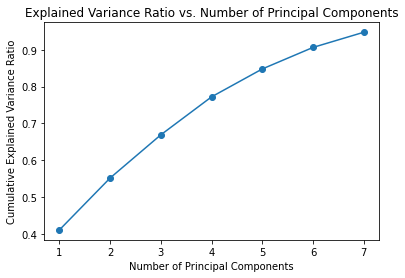

In [24]:
# Plot the explained variance ratio
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

## Apply Lasso, Ridge on PCA dataset

In [25]:
print(X_pca.shape, Y.shape)

(174762, 7) (174762,)


In [26]:
# Splitting dataset into train and test set 
X_train, X_test, Y_train, Y_test = train_test_split( X_pca, Y, test_size = 1 / 3, random_state = 0 )
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(116508, 7)
(58254, 7)
(116508,)
(58254,)


### Lasso

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
parameters = {'alpha': 0.5,
              'tol': 0.1
              }
model = Lasso(**parameters)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = r2_score(Y_test, Y_pred)
print("R2 {}".format(score))
mse = mean_squared_error(Y_test, Y_pred)
print("MSE", mse)

R2 0.35810077951349983
MSE 7179.382642015648


In [28]:
# Calculate the custom error metric
from error_define import *
Y_pred1 = Y_pred.reshape(-1, 1)
Y_test1 = Y_test.values.reshape(-1, 1)
downside_square_error(Y_pred1,Y_test1)

array([4511.23965485])

### Ridge

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
parameters = {'alpha': 0.5
              }
model = Ridge(**parameters)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
score = r2_score(Y_test, Y_pred)
print("R2 {}".format(score))
mse = mean_squared_error(Y_test, Y_pred)
print("MSE", mse)

R2 0.35866392804836766
MSE 7173.084053877401


In [30]:
# Calculate the custom error metric
from error_define import *
Y_pred1 = Y_pred.reshape(-1, 1)
Y_test1 = Y_test.values.reshape(-1, 1)
downside_square_error(Y_pred1,Y_test1)

array([4491.77941197])